<a href="https://colab.research.google.com/github/leideng/AI-primer/blob/main/transformer/self_attn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

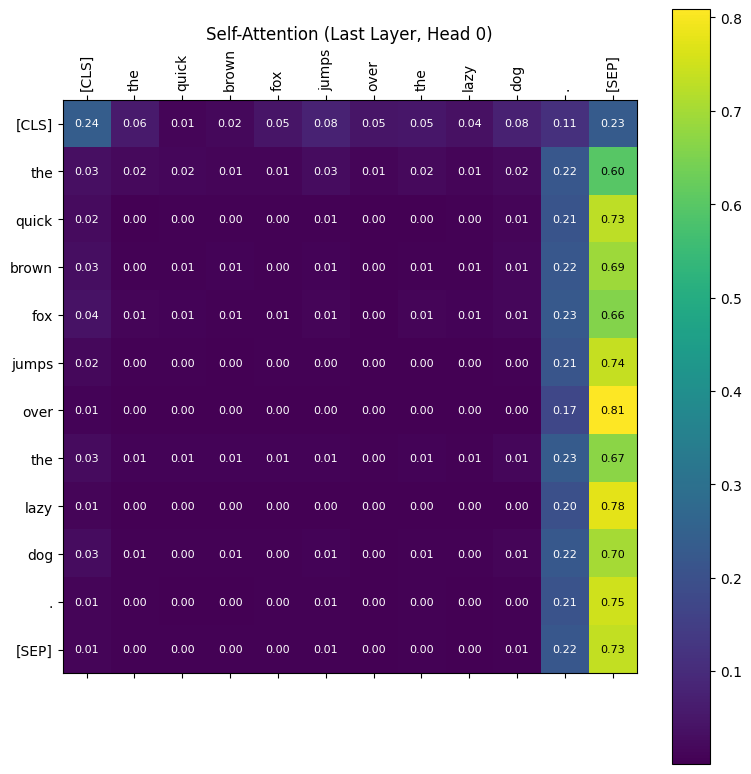

Self-Attention (Last Layer, Head 0):
       [CLS]    the  quick  brown    fox  jumps   over    the   lazy    dog  \
[CLS]  0.239  0.060  0.011  0.017  0.048  0.077  0.045  0.049  0.036  0.076   
the    0.032  0.020  0.016  0.013  0.010  0.026  0.010  0.021  0.013  0.020   
quick  0.023  0.003  0.004  0.005  0.004  0.006  0.001  0.004  0.004  0.010   
brown  0.031  0.005  0.005  0.007  0.005  0.009  0.001  0.005  0.005  0.014   
fox    0.040  0.010  0.008  0.006  0.006  0.013  0.002  0.010  0.007  0.013   
jumps  0.017  0.004  0.004  0.003  0.004  0.004  0.001  0.003  0.003  0.005   
over   0.010  0.000  0.001  0.001  0.002  0.001  0.000  0.001  0.001  0.003   
the    0.025  0.008  0.008  0.008  0.008  0.009  0.005  0.009  0.007  0.014   
lazy   0.011  0.001  0.002  0.002  0.002  0.002  0.001  0.001  0.001  0.003   
dog    0.028  0.006  0.004  0.005  0.005  0.007  0.002  0.006  0.004  0.011   
.      0.010  0.004  0.003  0.003  0.004  0.005  0.001  0.004  0.002  0.005   
[SEP]  0.010  0

In [5]:
from transformers import pipeline
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

# Input sentence
sentence = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(sentence, return_tensors="pt")

# Forward pass with attention outputs
outputs = model(**inputs)
attentions = outputs.attentions  # Tuple: (num_layers, batch, num_heads, seq_len, seq_len)

# Visualize attention from the last layer, first head
attention = attentions[-1][0][0].detach().numpy()  # (seq_len, seq_len)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Print attention values as a table
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(attention, cmap="viridis")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
fig.colorbar(cax)

# Annotate each cell with the attention value
for (i, j), val in np.ndenumerate(attention):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='w' if val < 0.5 else 'black', fontsize=8)

plt.title("Self-Attention (Last Layer, Head 0)")
plt.tight_layout()
plt.show()

# Also print the table for reference
df = pd.DataFrame(attention, columns=tokens, index=tokens)
print("Self-Attention (Last Layer, Head 0):")
print(df.round(3))
